In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%run task_1_text_preprocessing.ipynb
%run task_2_lexicon_sentiment.ipynb



{'text': 'Excellent earnings beat expectations', 'vader': {'compound': 0.572, 'label': 'positive'}, 'textblob': {'polarity': 1.0, 'label': 'positive'}, 'custom_score': 1.0, 'ensemble_score': 0.857, 'confidence': 1.0}


In [37]:
df = pd.read_csv(
    "/Users/dilipkumar/Downloads/archive/all-data.csv",
    encoding="latin-1"
)
df.columns = ["label", "sentence"]


In [40]:
tp = TextPreprocessor()
lsa = LexiconSentimentAnalyzer()

preds = []

for text in df["sentence"]:
    tokens = tp.preprocess(text)
    scores = lsa.analyze(text, tokens)

    if scores["ensemble_score"] > 0.15:
        preds.append("positive")
    elif scores["ensemble_score"] < -0.15:
        preds.append("negative")
    else:
        preds.append("neutral")


In [41]:
print("Accuracy:", accuracy_score(df["label"], preds))
print(classification_report(df["label"], preds))


Accuracy: 0.6125902992776058
              precision    recall  f1-score   support

    negative       0.48      0.18      0.26       604
     neutral       0.69      0.75      0.72      2878
    positive       0.47      0.52      0.49      1363

    accuracy                           0.61      4845
   macro avg       0.55      0.48      0.49      4845
weighted avg       0.60      0.61      0.60      4845



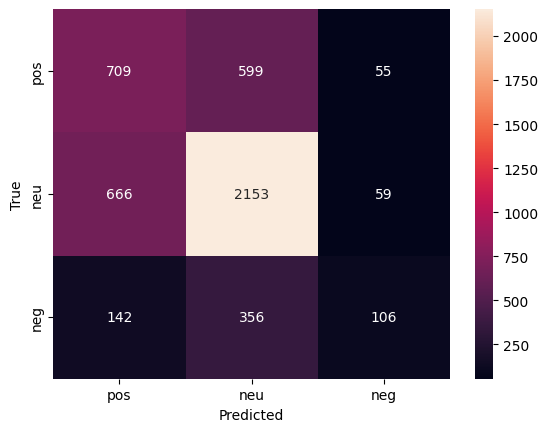

In [42]:
cm = confusion_matrix(df["label"], preds, labels=["positive", "neutral", "negative"])

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["pos", "neu", "neg"],
            yticklabels=["pos", "neu", "neg"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
